In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 as opcv
import os


In [73]:
SHAPES = ['Square', "Rectangle", "Ellipse", "Triangle"]
# 0:Square, 1: Rectange, 2: Ellipse, 3: Triangle

In [305]:
# Load the dataset

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\ImageForOpenCV\Dataset',                  #Enter the location of the dataset
    labels= 'inferred',
    label_mode= 'int',
    image_size= (100,100),
    class_names= ['0', '1', '2','3'],
    color_mode ='grayscale',
    shuffle=True,
    subset= 'training',
    validation_split=0.15,
    seed = 100
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\ImageForOpenCV\Dataset',                #Enter the location of the dataset
    labels= 'inferred',
    label_mode= 'int',
    image_size= (100, 100),
    class_names= ['0', '1','2','3'],
    color_mode ='grayscale',
    shuffle=True,
    subset= 'validation',
    validation_split= 0.15,
    seed = 100
)

Found 5504 files belonging to 4 classes.
Using 4679 files for training.
Found 5504 files belonging to 4 classes.
Using 825 files for validation.


In [308]:
# Model architecture

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation= tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(4, activation= tf.nn.softmax),
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [309]:
# Fit the model

model.fit(ds_train, epochs = 25)

Epoch 1/25
147/147 [==============================] - 3s 19ms/step - loss: 59.6691 - accuracy: 0.4633

In [407]:
# Evaluate the model

model.evaluate(ds_validation)

26/26 [==============================] - 0s 7ms/step - loss: 0.3457 - accuracy: 0.9636


[0.34574243426322937, 0.9636363387107849]

In [408]:
# Trying to predict different shapes


[[0. 1. 0. 0.]]
16  Predicted shape: Rectangle


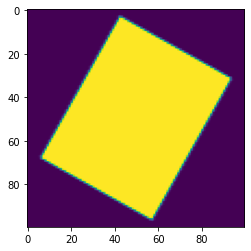

In [409]:
i = 16
DATADIR = "D:/ImageForOpenCV/Test/Rec/rec"+str(i)+".png"
img = opcv.imread(DATADIR, 0)
plt.imshow(img)
img = img.reshape(1, 100 * 100)

prediction = (model.predict(img))
print(prediction)
print(i," Predicted shape:",SHAPES[np.argmax(prediction)])